# Generating An Imbalanced Binary Dataset

In [2]:
import sklearn
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# define an imbalanced binary dataset
# 2 informative features
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [4]:
# convert to pandas Dataframe
imb_df = pd.DataFrame(X, columns = ['X1','X2'])
imb_df['y'] = y

# Examine Dataset

In [5]:
imb_df.head()

,X1,X2,y
0,0.222014,0.540207,0
1,1.347439,1.412824,0
2,0.537238,0.372730,0
3,2.134462,1.404819,0
4,2.315827,1.356858,0


In [6]:
imb_df.describe()

,X1,X2,y
count,10000.000000,10000.000000,10000.000000
mean,0.966733,0.997252,0.010000
std,0.950270,0.467640,0.099504
min,-3.091974,-0.622193,0.000000
25%,0.335374,0.686097,0.000000
50%,0.965995,0.998290,0.000000
75%,1.605024,1.307164,0.000000
max,4.447943,3.087821,1.000000


In [7]:
# Get frequency of classes in the dataset
imb_df['y'].value_counts()

0    9900
1     100
Name: y, dtype: int64

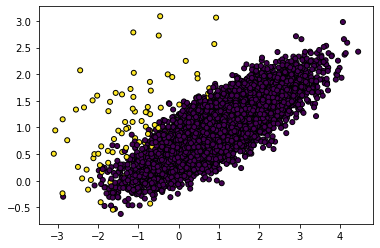

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# Make Initial Classification

In [9]:
from sklearn.svm import SVC

svc_no_imb = SVC(gamma='auto')
svc_no_imb.fit(X,y)

SVC(gamma='auto')

In [10]:
# function to plot decision boundary of a classifier
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

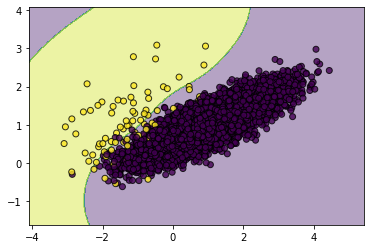

In [14]:
#fig, ax = plt.figure(figsize=(15,12))
ax = plt.axes()
plot_decision_function(X,y, svc_no_imb,ax)